In [28]:
import sqlite3
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Connect to SQLite database
conn = sqlite3.connect('batcallsv14.db')
cursor = conn.cursor()

query = "SELECT arr,target FROM batcalls WHERE call < 10000"

df = pd.read_sql_query(query, conn)

#Close the connection
conn.close()


def convert_to_array(binary_data):
    return np.frombuffer(binary_data, dtype=np.int16)

df['SpectrogramData'] = df['arr'].apply(convert_to_array)
df = df.drop('arr', axis=1)
df_spectrogram = df['SpectrogramData'].apply(pd.Series)

#Concatenate the split columns with the original DataFrame
df = pd.concat([df, df_spectrogram], axis= 1).drop('SpectrogramData', axis = 1)

#ungefähr 470 zeilen mit doppelter SpaltenZahl
df[]


,target,0,1,2,3,4,5,6,7,8,...,8874,8875,8876,8877,8878,8879,8880,8881,8882,8883
0,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,18,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Überprüfe die Verteilung
print(df.groupby('target').size())

target
0      477
1       57
2      540
3      575
4      564
5      431
6      577
7       78
8       71
9      104
10     251
11     865
12     962
13     413
14    1173
15     878
16     151
17     282
18    1551
dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
df = df.iloc[:,:4475]
Inputs = df.drop(columns=['target'])
Target = df['target']

X_train, X_test, y_train, y_test = train_test_split(Inputs, Target, test_size=0.2)

X_test

,0,1,2,3,4,5,6,7,8,9,...,4464,4465,4466,4467,4468,4469,4470,4471,4472,4473
6251,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,-59.0,-56.0,-149.0,-187.0,-8.0,103.0,127.0,224.0,261.0,124.0
5567,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,712.0,502.0,153.0,-215.0,-478.0,-649.0,-734.0,-595.0,-216.0,220.0
4721,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,-868.0,30.0,219.0,-925.0,-57.0,-29.0,-653.0,-220.0,-587.0,-202.0
8591,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,-12.0,9.0,24.0,18.0,24.0,2.0,-14.0,-19.0,0.0,-7.0
1774,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,193.0,155.0,100.0,-15.0,-87.0,-108.0,-248.0,-325.0,-232.0,-270.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,28.0,-3.0,-58.0,-53.0,6.0,21.0,-34.0,-53.0,18.0,61.0
8604,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,122.0,141.0,93.0,-8.0,-50.0,-130.0,-105.0,20.0,25.0,106.0
6352,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,22.0,14.0,6.0,-3.0,-14.0,-22.0,-29.0,-31.0,-28.0,-21.0
1486,20115.0,19797.0,22864.0,1.0,118.0,10107.0,25956.0,25459.0,10098.0,8250.0,...,54.0,-20.0,-52.0,16.0,-9.0,-26.0,-3.0,-13.0,0.0,-4.0


In [36]:
#ForFun LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

df_reg = df.iloc[:,:4475]
Inputs = df_reg.drop(columns=['target'])
Target = df_reg['target']

X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = train_test_split(Inputs, Target, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_logreg = scaler.fit_transform(X_train_logreg)
#X_test_logreg = scaler.transform(X_test_logreg)

logistic_reg=LogisticRegression(); # Modell spezifizieren
logistic_reg.fit(X_train_logreg,y_train_logreg); # Modell fitten - Trainingsmenge
print(logistic_reg.score(X_train_logreg,y_train_logreg)) # Trainingsmenge
print(logistic_reg.score(X_test_logreg,y_test_logreg)) # Testmenge

0.46925
0.226


/home/sebastian/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
#ForFun LDA
df_lda = df.iloc[:,:4475]
Inputs = df_lda.drop(columns=['target'])
Target = df_lda['target']

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(Inputs, Target, test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#X_train_lda = scaler.fit_transform(X_train_lda)
#X_test_lda = scaler.transform(X_test_lda)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
lda.fit(X_train_lda, y_train_lda)
                                
print(lda.score(X_train_lda, y_train_lda))
print(lda.score(X_test_lda, y_test_lda))                   

0.8495
0.1695


Maximum Testscore  0.413  bei  3


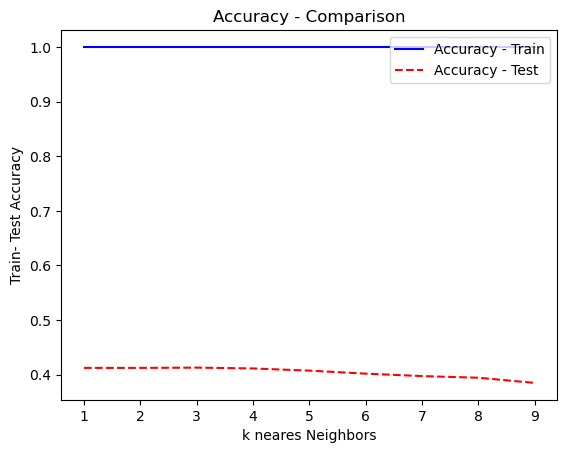

In [39]:
#KNN Klassifikator
from sklearn import neighbors

df_knn = df.iloc[:,:4475]
Inputs_knn = df_knn.drop(columns=['target'])
Target_knn = df_knn['target']

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(Inputs_knn, Target_knn, test_size=0.2)

#scaler = MinMaxScaler()
#X_train_knn = scaler.fit_transform(X_train_knn)
#X_test_knn = scaler.transform(X_test_knn)

train_scores_knn = []
test_scores_knn = []
for i in range(1,10):
    n_neighbors = i

    knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance'); #uniform - distance
    knnclf.fit(X_train_knn, y_train_knn);
    train_scores.append(knnclf.score(X_train_knn, y_train_knn))
    test_scores.append(knnclf.score(X_test_knn, y_test_knn))

plt.plot(range(1,10),train_scores_knn,'b-',label='Accuracy - Train');
plt.plot(range(1,10),test_scores_knn,'r--',label='Accuracy - Test');

plt.xlabel('k neares Neighbors')
plt.ylabel('Train- Test Accuracy') 
plt.title('Accuracy - Comparison')
plt.legend(loc='upper right');
max_score_index = np.argmax(test_scores_knn)
print("Maximum Testscore ", test_scores_knn[max_score_index], " bei ", max_score_index+1)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

bestknn = neighbors.KNeighborsClassifier(max_score_index+1, weights='distance')
scores_knn = cross_val_score(bestknn,Inputs_knn , Target_knn, cv=7, scoring='accuracy') #F1-Score?

print(scores_knn)

[0.40307908 0.41427572 0.40237929 0.41707488 0.39985994 0.42086835
 0.42857143]


Maximum Testscore  0.353  bei  8


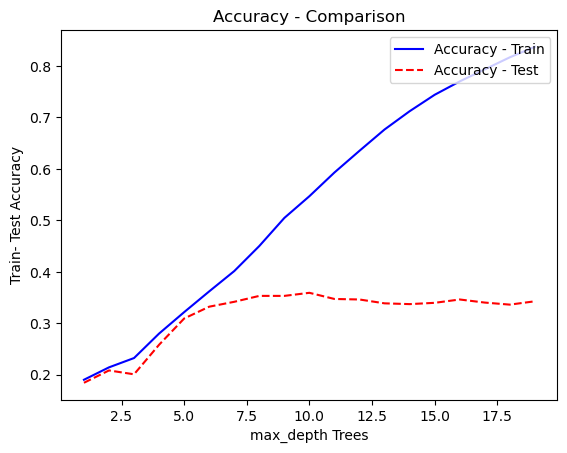

In [64]:
#Classification Trees
from sklearn.tree import DecisionTreeClassifier

df_dt = df.iloc[:,:4475]
Inputs_dt = df_dt.drop(columns=['target'])
Target_dt = df_dt['target']

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(Inputs_dt, Target_dt, test_size=0.2)


#scaler = MinMaxScaler()
#X_train_dt = scaler.fit_transform(X_train_dt)
#X_test_dt = scaler.transform(X_test_dt)

train_scores_dt = []
test_scores_dt = []
for i in range(1,20):
    decision_tree = DecisionTreeClassifier(max_depth=i, criterion='gini')
    decision_tree.fit(X_train_dt, y_train_dt)

    train_scores_dt.append(decision_tree.score(X_train_dt, y_train_dt))
    test_scores_dt.append(decision_tree.score(X_test_dt, y_test_dt))

plt.plot(range(1,20),train_scores_dt,'b-',label='Accuracy - Train');
plt.plot(range(1,20),test_scores_dt,'r--',label='Accuracy - Test');

plt.xlabel('max_depth Trees')
plt.ylabel('Train- Test Accuracy') 
plt.title('Accuracy - Comparison')
plt.legend(loc='upper right');
max_score_index_dt = np.argmax(test_scores_dt)
print("Maximum Testscore ", test_scores_dt[max_score_index], " bei ", max_score_index+1)

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,f1_score

best_tree = DecisionTreeClassifier(max_depth=max_score_index_dt+1, criterion='gini')
#scores_dt = cross_val_score(best_tree, Inputs_dt , Target_dt, cv=7, scoring='accuracy') #F1-Score?

#print(scores_dt)

best_tree.fit(X_train_dt, y_train_dt)
feat_importance_dt = best_tree.tree_.compute_feature_importances(normalize=True)

#Wichtigkeit der einzelnen Prädiktor-Variablen:

np.where(feat_importance_dt > 0)

(array([  93,   94,  103,  106,  111,  112,  113,  114,  123,  125,  134,
         135,  136,  143,  146,  149,  163,  168,  169,  171,  175,  180,
         184,  241,  324,  350,  400,  503,  512,  542,  583,  642,  673,
         780,  842,  855,  858,  902,  916,  955, 1014, 1084, 1098, 1151,
        1158, 1246, 1257, 1272, 1320, 1379, 1444, 1600, 1606, 1746, 1783,
        1856, 1878, 1908, 1911, 1937, 1993, 2026, 2039, 2046, 2050, 2052,
        2053, 2055, 2056, 2059, 2061, 2062, 2064, 2065, 2069, 2070, 2073,
        2079, 2080, 2083, 2090, 2091, 2092, 2095, 2102, 2172, 2218, 2240,
        2264, 2368, 2434, 2584, 2717, 2744, 2760, 2776, 2786, 2912, 2954,
        2963, 2972, 2973, 2977, 2978, 2983, 2987, 2991, 2996, 2999, 3001,
        3003, 3005, 3010, 3012, 3013, 3016, 3019, 3025, 3026, 3028, 3040,
        3077, 3129, 3190, 3341, 3377, 3413, 3453, 3484, 3528, 3618, 3629,
        3741, 3744, 3746, 3765, 3773, 3870, 3879, 3954, 3964, 3993, 4045,
        4143, 4147, 4197, 4245, 4258, 